In [1]:
import os
if '_cwd_set' not in locals(): locals()['_cwd_set'] = os.chdir(os.path.dirname(os.getcwd()))
import omnifig as fig
fig.initialize()
from src.jimports import *
from src.util import set_default_device, repo_root, data_root
device = set_default_device();

Selecting CUDA device 0 with 33390 MiB free memory and 100% utilization


In [2]:
from src.dataset import ImageNet, ImageNetCLIP
from src.pretrained import CLIP, CLIP_ImageNet_Classifier

In [3]:
model = CLIP_ImageNet_Classifier()
model.prepare(None, device=device);

/home/felix/workspace/remote/src/pretrained.py:94: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self._class_embeddings = torch.load(self._path).unsqueeze(0)


In [4]:
example = torch.randn(20, 512).to(device)

In [5]:
model._class_embeddings.shape

torch.Size([1, 1000, 512])

In [6]:
pred = model.predict(example)
pred.shape

torch.Size([20, 1000])

In [9]:
pred.argmax(dim=1)

tensor([382, 161, 380, 959,  14, 460, 752, 609, 956,  50, 612, 729, 375, 218,
        614, 953, 584, 581, 510, 416], device='cuda:0')

In [4]:
dataset = ImageNetCLIP(split='val')
dataset.load()
dataset.size

50000

In [5]:
clip = CLIP()
clip.prepare(None, device=device);

In [6]:
cats = dataset._label_names
num_cats = len(cats)
text = [cats[i] for i in range(num_cats)]
len(text)

1000

In [7]:
with torch.no_grad():
    embedding = clip.embed_text(text)
embedding.shape

torch.Size([1000, 512])

In [9]:
path = dataset.dataroot / 'class_embeddings.pt'
torch.save(embedding, path)

In [10]:
path

PosixPath('/data/felix/imagenet/class_embeddings.pt')

In [4]:
dataset._label_names

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [4]:
batch = dataset.batch()
batch.size

16

15
shopping cart


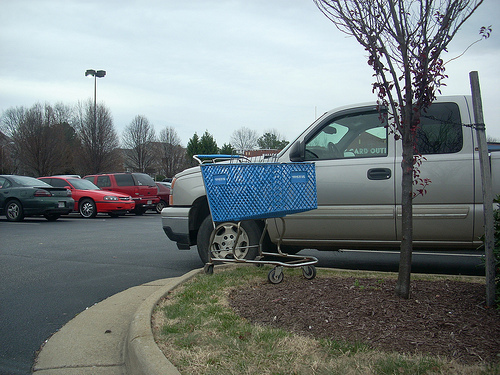

In [8]:
idx = random.randint(0, batch.size-1)
print(idx)
print(batch['label_name'][idx])
batch['image'][idx]

In [3]:
dataset = ImageNet('val').load()
dataset.size

50000

In [4]:
ctx = Context(dataset)
ctx['index'] = torch.randint(0, dataset.size, (4,))

In [5]:
images = ctx['images']
images.shape

torch.Size([4, 3, 224, 224])

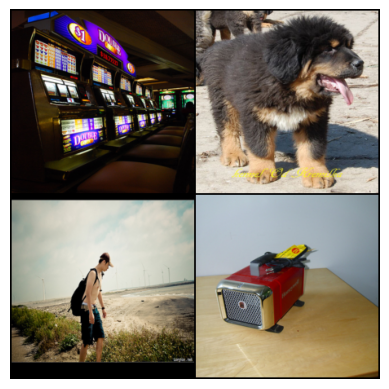

In [6]:
grid_image = vutils.make_grid(images, nrow=2, padding=2)  # nrow controls the number of images per row

# Convert the grid tensor (3, H, W) to (H, W, 3) and display it
plt.imshow(grid_image.permute(1, 2, 0).numpy())
plt.axis('off')  # Hide the axes
plt.show()

In [7]:
ctx['classes']

['slot, one-armed bandit',
 'Tibetan mastiff',
 'backpack, back pack, knapsack, packsack, rucksack, haversack',
 'space heater']